# Loading the Data

In [1]:
import pandas as pd
import numpy as np


#file paths
#election_data = r'usa-2016-presidential-election-by-county.csv'
election_data = r'usa.csv'
covid_data = r'coronavirus-covid-19-pandemic-usa-counties (2021).csv'
#load the datasets
raw_dataset = pd.read_csv(election_data, delimiter = ';')
raw_dataset_covid = pd.read_csv(covid_data, delimiter = ';')

In [2]:
print('Election Data')
print(raw_dataset.shape)
print(raw_dataset)

Election Data
(3143, 159)
               State  ST   Fips                           County  Precincts  \
0            Georgia  GA  13231             Pike County, Georgia        8.0   
1               Utah  UT  49051             Wasatch County, Utah       38.0   
2         Washington  WA  53021      Franklin County, Washington       15.0   
3           Nebraska  NE  31119         Madison County, Nebraska       22.0   
4            Florida  FL  12045             Gulf County, Florida        9.0   
...              ...  ..    ...                              ...        ...   
3138       Tennessee  TN  47131          Obion County, Tennessee       12.0   
3139        Michigan  MI  26099          Macomb County, Michigan      337.0   
3140   West Virginia  WV  54007    Braxton County, West Virginia       18.0   
3141  North Carolina  NC  37121  Mitchell County, North Carolina        9.0   
3142        Maryland  MD  24019      Dorchester County, Maryland       39.0   

         Votes  Democrats

In [3]:
print('COVID Data')
print(raw_dataset_covid.shape)
print(raw_dataset_covid.head(10))

COVID Data
(384930, 7)
   Admin 2 FIPS Code  Province/State  \
0            42133.0    Pennsylvania   
1            72051.0     Puerto Rico   
2            72053.0     Puerto Rico   
3            72097.0     Puerto Rico   
4            72151.0     Puerto Rico   
5            45041.0  South Carolina   
6            45063.0  South Carolina   
7            45071.0  South Carolina   
8            45087.0  South Carolina   
9            46007.0    South Dakota   

  Admin 2 Level (City/County/Borough/Region)        Date  Total Death  \
0                                       York  2021-01-17          545   
1                                     Dorado  2021-01-17            0   
2                                    Fajardo  2021-01-17            0   
3                                   Mayaguez  2021-01-17            0   
4                                    Yabucoa  2021-01-17            0   
5                                   Florence  2021-01-17          313   
6                        

# Selecting the Desired Columns (Election Data)

In [4]:
#list the desired columns for election data
desired_columns = ['State', 'Fips', 'County', 'Precincts', 'Less Than High School Diploma',\
       'At Least High School Diploma', 'At Least Bachelors\'s Degree', 'Graduate Degree', 'School Enrollment', \
       'Median Earnings 2010', 'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',\
           'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient', \
               'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations', \
           'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations', 'White',
       'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'White  Asian', \
           'Median Age', 'Poor.physical.health.days', 'Poor.mental.health.days', \
              'Adult.smoking', 'Adult.obesity', 'Diabetes', 'Sexually.transmitted.infections',
       'HIV.prevalence.rate', 'Uninsured', 'Unemployment']

#select only desired columns from dataset
dataset = raw_dataset[desired_columns]    
print('Election Data shape after selecting columns: ', dataset.shape)

Election Data shape after selecting columns:  (3143, 38)


# Missing Values (Election Data)

In [5]:
#get missing value counts for columns
missing_count = dataset.isnull().sum()

# missing value percents for columns
missing_count_percent = missing_count/dataset.shape[0]*100

#print missing value percents
print('Election Data Missing Value Percents: ')
print(missing_count_percent)

Election Data Missing Value Percents: 
State                                                          0.000000
Fips                                                           0.000000
County                                                         0.000000
Precincts                                                      1.018136
Less Than High School Diploma                                  0.000000
At Least High School Diploma                                   0.000000
At Least Bachelors's Degree                                    0.000000
Graduate Degree                                                0.000000
School Enrollment                                              0.000000
Median Earnings 2010                                           0.000000
Children Under 6 Living in Poverty                             0.000000
Adults 65 and Older Living in Poverty                          0.000000
Total Population                                               0.000000
Poverty.Rate.below.federa

In [6]:
#drop HIV column due to 26% missing values and STD field being similar
dataset = dataset.drop('HIV.prevalence.rate', axis=1)

In [7]:
#get column averages to fill missing values
col_avgs = dataset.mean()

#fill in mean for missing values of remaining columns
dataset = dataset.fillna(col_avgs)

# Get Only Most Recent Date for Each FIPS Code

In [8]:
#get only most recent date for each FIPS code
def get_max_rows(df):
    B_maxes = df.groupby('Admin 2 FIPS Code').Date.transform(max)
    return df[df.Date == B_maxes] 


raw_dataset_covid = get_max_rows(raw_dataset_covid)

# Selecting Desired Columns (Covid Data)

In [9]:
#add fatality rate (deaths/cases) to data
raw_dataset_covid['Fatality Rate']=raw_dataset_covid['Total Death']/raw_dataset_covid['Total Confirmed']
raw_dataset_covid['Fatality Rate'] = raw_dataset_covid['Fatality Rate'].fillna(0) #set null fatality rate to 0

In [10]:
#pick out desired columns from raw data
desired_columns = ['Admin 2 FIPS Code', 'Date', 'Total Death','Total Confirmed', 'Fatality Rate', 'location']

dataset_covid = raw_dataset_covid[desired_columns]
print('Covid Data Shape after selecting columns: ', dataset_covid.shape)

Covid Data Shape after selecting columns:  (3280, 6)


# Missing Values (Covid Data)

In [11]:
#get missing value counts for columns
missing_count = dataset_covid.isnull().sum()

# missing value percents for columns
missing_count_percent = missing_count/dataset_covid.shape[0]*100

#print missing value percents
print('Covid Data Missing Value Percents: ')
print(missing_count_percent)

Covid Data Missing Value Percents: 
Admin 2 FIPS Code    0.0
Date                 0.0
Total Death          0.0
Total Confirmed      0.0
Fatality Rate        0.0
location             0.0
dtype: float64


# Split location into Latitude and Longitide

In [12]:
#split tuple into list by comma
new = dataset_covid['location'].str.split(",", n=1, expand = True)

#create new columns for each value
dataset_covid['Latitude'] = new[0]
dataset_covid['Longitude'] = new[1]

#change column types from object to float
dataset_covid['Latitude'] = dataset_covid['Latitude'].astype(float)
dataset_covid['Longitude'] = dataset_covid['Longitude'].astype(float)

#drop original location column
dataset_covid = dataset_covid.drop('location',axis=1)

<ipython-input-12-35e04b0df4c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_covid['Latitude'] = new[0]


# Joining Election & Covid Datasets together on FIPS Code

In [13]:
#join the datasets together (inner join)
df_merged = pd.merge(left = dataset, right=dataset_covid, left_on='Fips', right_on = 'Admin 2 FIPS Code', how='inner')

#drop any duplicates that formed during the inner join
df = df_merged.drop_duplicates()

#drop redundant column (don't need both columns from join because they will always have same value)
df= df.drop(['Admin 2 FIPS Code'], axis=1)

# Add Positivity Rate

In [14]:
df['Positivity Rate'] = df['Total Confirmed']/df['Total Population']

# Add Risk Class

In [15]:
#get the national average of positivity rate
nat_avg_pos = df['Positivity Rate'].mean()
nat_avg_fat = df['Fatality Rate'].mean()

print('Positivty Rate (National Average): ', nat_avg_pos)
print('Fatality Rate (National Average): ', nat_avg_fat)

Positivty Rate (National Average):  0.0993371818466617
Fatality Rate (National Average):  0.019584600179735845


2-Class

In [16]:
def two_class(df, field, new_field_name):
    #define high risk as areas where value is higher than national average
    df[new_field_name] = np.where(df[field]>df[field].mean(), 1, 0)
    #get the counts of each class
    print(df[new_field_name].value_counts())
    return df

df = two_class(df, 'Positivity Rate', 'high risk positivity')
df = two_class(df, 'Fatality Rate', 'high risk fatality')

1    1573
0    1567
Name: high risk positivity, dtype: int64
0    1779
1    1361
Name: high risk fatality, dtype: int64


6-Class

In [17]:
def between(num, low, high):
    return( num >= low) & (num < high)


def six_class(df, field, new_field_name):
    #get mean and standard deviation
    avg = df[field].mean()
    std = df[field].std()
    
    #get class threshold values
    thres1 = avg + 2*std
    thres2 = avg + std
    thres3 = avg
    thres4 = avg - std
    thres5 = avg - (2*std)

    #add new class columns
    df[new_field_name] = pd.cut(df[field],bins=[-1, thres5, thres4, thres3, thres2, thres1,2], labels=[0,1,2,3,4,5])

    #get the counts of each class
    print(df[new_field_name].value_counts())

    
    
    return df


df = six_class(df, 'Positivity Rate', 'risk level positivity')
df = six_class(df, 'Fatality Rate', 'risk level fatality')


3    1194
2    1165
1     309
4     294
0      93
5      85
Name: risk level positivity, dtype: int64
2    1425
3     935
1     354
4     317
5     109
0       0
Name: risk level fatality, dtype: int64


# Dataset Before Normalization

In [18]:
print(df)

               State   Fips                           County  Precincts  \
0            Georgia  13231             Pike County, Georgia        8.0   
1               Utah  49051             Wasatch County, Utah       38.0   
2         Washington  53021      Franklin County, Washington       15.0   
3           Nebraska  31119         Madison County, Nebraska       22.0   
4            Florida  12045             Gulf County, Florida        9.0   
...              ...    ...                              ...        ...   
3135       Tennessee  47131          Obion County, Tennessee       12.0   
3136        Michigan  26099          Macomb County, Michigan      337.0   
3137   West Virginia  54007    Braxton County, West Virginia       18.0   
3138  North Carolina  37121  Mitchell County, North Carolina        9.0   
3139        Maryland  24019      Dorchester County, Maryland       39.0   

      Less Than High School Diploma  At Least High School Diploma  \
0                             

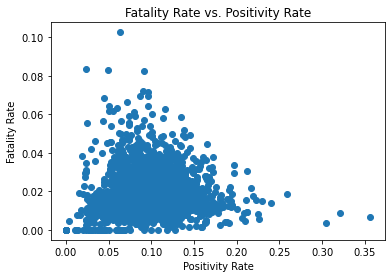

In [19]:
import matplotlib.pyplot as plt

plt.scatter(df['Positivity Rate'], df['Fatality Rate'])
plt.title('Fatality Rate vs. Positivity Rate')
plt.xlabel('Positivity Rate')
plt.ylabel('Fatality Rate')
plt.show()

# Normalization

In [20]:
#define function for normalizing data
def normalize_data(df, norm_type = 'mean', norm_min=0, norm_max=1):
    #get only numeric columns
    df_num = df.select_dtypes(include=[np.number])
    
    if norm_type == 'mean': #mean normalization
        df_norm=(df_num-df_num.mean())/df_num.std()

    else: #min max normalization
        df_norm=(df_num-df_num.min())/(df_num.max()-df_num.min())
        span = norm_max-norm_min
        midpoint = span/2 - (norm_max + norm_min)/2 
        df_norm = df_norm*(span)-midpoint #adjust from 0-1 to desired range
        
    #add categorical columns back in
    df[df_norm.columns] = df_norm
    return df

In [21]:
#normalize the data (start at column 2 so FIPS code is not normalized)
df.iloc[:,2:] = normalize_data(df.iloc[:,2:], 'min_max',norm_min=0,norm_max=1)

# Final Dataset

In [22]:
print(df.head(20))

            State   Fips                        County  Precincts  \
0         Georgia  13231          Pike County, Georgia   0.001404   
1            Utah  49051          Wasatch County, Utah   0.007419   
2      Washington  53021   Franklin County, Washington   0.002807   
3        Nebraska  31119      Madison County, Nebraska   0.004211   
4         Florida  12045          Gulf County, Florida   0.001604   
5         Georgia  13267      Tattnall County, Georgia   0.001404   
6       Wisconsin  55083      Oconto County, Wisconsin   0.005414   
7         Alabama   1059      Franklin County, Alabama   0.005013   
8      Washington  53015    Cowlitz County, Washington   0.005815   
9        Missouri  29061      Daviess County, Missouri   0.001203   
10    Mississippi  28033    DeSoto County, Mississippi   0.007620   
11        Montana  30007    Broadwater County, Montana   0.000802   
12      Wisconsin  55041      Forest County, Wisconsin   0.003008   
13  West Virginia  54055  Mercer C

# Logistic Regression: Binary Classification

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
import matplotlib.pyplot as plt 
%matplotlib inline

#positivity rate binary classification
#drop all the classes, state, county, date, Fips, positivity rate 
data_p = df.drop(['State', 'County', 'Date', 'Fips', 'Positivity Rate', 'high risk positivity', 
                'high risk fatality','risk level positivity', 'risk level fatality'], axis = 1)
#drop all the classes, state, county, date, Fips, fatality rate 
data_f = df.drop(['State', 'County', 'Date', 'Fips', 'Fatality Rate', 'high risk positivity', 
                'high risk fatality','risk level positivity', 'risk level fatality'], axis = 1)
#binary: 0 for low risk, 1 for high risk
label_pos_bin = df['high risk positivity']
#label_pos_mul = df['risk level positivity']
label_fat_bin = df['high risk fatality']
#label_fat_mul = df['risk level fatality']
data_p.info()
print(data_p.shape)
data_f.info()
print(data_f.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 39 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Precincts                                                   3140 non-null   float64
 1   Less Than High School Diploma                               3140 non-null   float64
 2   At Least High School Diploma                                3140 non-null   float64
 3   At Least Bachelors's Degree                                 3140 non-null   float64
 4   Graduate Degree                                             3140 non-null   float64
 5   School Enrollment                                           3140 non-null   float64
 6   Median Earnings 2010                                        3140 non-null   float64
 7   Children Under 6 Living in Poverty                          3140 non-null   float64
 8 

Text(0, 0.5, 'High Risk')

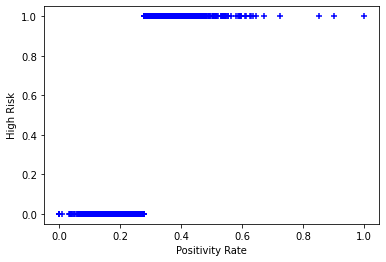

In [24]:
#scatterplot of positivity rate with class
plt.scatter(df['Positivity Rate'], df['high risk positivity'], marker = '+', color = 'blue')
plt.xlabel('Positivity Rate')
plt.ylabel('High Risk')

Text(0, 0.5, 'High Risk')

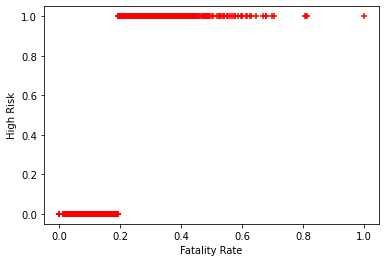

In [25]:
#scatterplot of Fatality rate with class
plt.scatter(df['Fatality Rate'], df['high risk fatality'], marker = '+', color = 'red')
plt.xlabel('Fatality Rate')
plt.ylabel('High Risk')

# Positivity Rate with binary classification

In [26]:
#spliting testing and training set
x_train, x_test, y_train, y_test = train_test_split(data_p, label_pos_bin, random_state = 0, test_size = 0.10)

#train the model 
model_pos_bin = LogisticRegression(max_iter = 500)
model_pos_bin.fit(x_train, y_train)

#predict the testing data, accuracy
pred_pos_bin = model_pos_bin.predict(x_test)
test_acc_pos_bin =  metrics.accuracy_score(pred_pos_bin, y_test)
print('Testing Accuracy: \n', test_acc_pos_bin)
print('\n')
#accuracy score the training data
train_acc_pos_bin = model_pos_bin.score(x_train, y_train)
print('Training Accuracy: \n', train_acc_pos_bin)


Testing Accuracy: 
 0.7038216560509554


Training Accuracy: 
 0.7009907997169144


In [27]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix\n', confusion_matrix(pred_pos_bin, y_test))
print('\n')
print('Classification Report\n', classification_report(pred_pos_bin, y_test))

Confusion Matrix
 [[111  40]
 [ 53 110]]


Classification Report
               precision    recall  f1-score   support

         0.0       0.68      0.74      0.70       151
         1.0       0.73      0.67      0.70       163

    accuracy                           0.70       314
   macro avg       0.71      0.70      0.70       314
weighted avg       0.71      0.70      0.70       314



In [28]:
#weight on each features: coef_[0] is for class 1, coef_[-1] is for class 0 
weight = pd.Series(model_pos_bin.coef_[0], index=data_p.columns.values)
print(weight.sort_values(ascending=False))

Gini.Coefficient                                              2.692240
Less Than High School Diploma                                 2.348532
Production.transportation.and.material.moving.occupations     2.234238
Amerindian                                                    2.233836
Total Confirmed                                               1.533001
Adult.obesity                                                 1.480317
Adults 65 and Older Living in Poverty                         1.374347
Sexually.transmitted.infections                               1.365952
Total Death                                                   1.196754
Sales.and.office.occupations                                  0.963653
At Least Bachelors's Degree                                   0.858170
Hispanic                                                      0.670128
Median Earnings 2010                                          0.650514
School Enrollment                                             0.489561
White 

ROC/AUC Curve


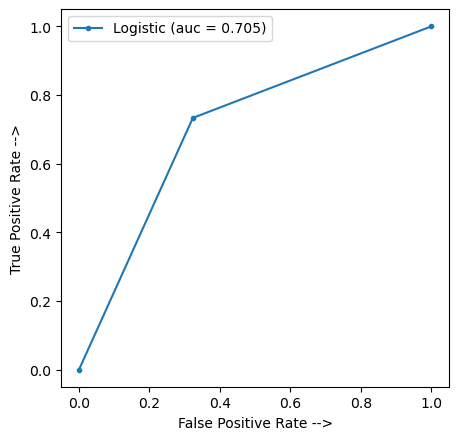

In [29]:
#Plot ROC Curve with AUC score
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, pred_pos_bin)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
print('ROC/AUC Curve')
plt.show()

# Fatality Rate with binary classification

In [30]:
#spliting testing and training set
x_train, x_test, y_train, y_test = train_test_split(data_f, label_fat_bin, random_state = 0, test_size = 0.10)

#train the model 
model_fat_bin = LogisticRegression(max_iter=200)
model_fat_bin.fit(x_train, y_train)

#predict the testing data, accuracy
pred_fat_bin = model_fat_bin.predict(x_test)
test_acc_fat_bin =  metrics.accuracy_score(pred_fat_bin, y_test)
print('Testing Accuracy: \n', test_acc_fat_bin)
print('\n')
#accuracy score the training data
train_acc_fat_bin = model_fat_bin.score(x_train, y_train)
print('Training Accuracy: \n', train_acc_fat_bin)

Testing Accuracy: 
 0.7133757961783439


Training Accuracy: 
 0.686482661004954


In [31]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix\n', confusion_matrix(pred_fat_bin, y_test))
print('\n')
print('Classification Report\n', classification_report(pred_fat_bin, y_test))

Confusion Matrix
 [[149  59]
 [ 31  75]]


Classification Report
               precision    recall  f1-score   support

         0.0       0.83      0.72      0.77       208
         1.0       0.56      0.71      0.62       106

    accuracy                           0.71       314
   macro avg       0.69      0.71      0.70       314
weighted avg       0.74      0.71      0.72       314



In [32]:
#weight on each features: coef_[0] is for class 1
weight = pd.Series(model_fat_bin.coef_[0], index=data_f.columns.values)
print(weight.sort_values(ascending=False))

Median Age                                                    3.830289
Diabetes                                                      2.474467
School Enrollment                                             2.024323
Longitude                                                     1.875049
Gini.Coefficient                                              1.528629
Total Death                                                   1.429731
Hispanic                                                      1.311868
Children Under 6 Living in Poverty                            0.836583
Management.professional.and.related.occupations               0.675038
Adults 65 and Older Living in Poverty                         0.644732
Sexually.transmitted.infections                               0.589235
Production.transportation.and.material.moving.occupations     0.483886
Uninsured                                                     0.453224
Median Earnings 2010                                          0.403614
Amerin

ROC/AUC Curve


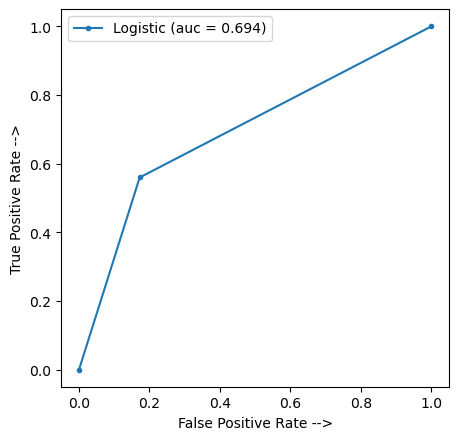

In [33]:
#Plot ROC Curve with AUC score
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, pred_fat_bin)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
print('ROC/AUC Curve')
plt.show()

# Multi-class Logistic Regression

# Positivity Rate with multiclass

In [34]:
label_pos_mul = df['risk level positivity']


#spliting testing and training set
x_train, x_test, y_train, y_test = train_test_split(data_p, label_pos_mul, random_state=0, test_size = 0.20)

print(x_test.shape)
print(x_train.shape)
print('\n')
#train the model 
#uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’
model_pos_mul = LogisticRegression(multi_class='multinomial', max_iter = 500) 
model_pos_mul.fit(x_train, y_train)

#predict the testing data, accuracy
pred_pos_mul = model_pos_mul.predict(x_test)
test_acc_pos_mul =  metrics.accuracy_score(pred_pos_mul, y_test)
print('Testing Accuracy: \n', test_acc_pos_mul)
print('\n')
#accuracy score the training data
train_acc_pos_mul = model_pos_mul.score(x_train, y_train)
print('Training Accuracy: \n', train_acc_pos_mul)



(628, 39)
(2512, 39)


Testing Accuracy: 
 0.49522292993630573


Training Accuracy: 
 0.5151273885350318


In [35]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix\n', confusion_matrix(pred_pos_mul, y_test))
print('\n')
print('Classification Report\n', classification_report(pred_pos_mul, y_test))
print('\n')


Confusion Matrix
 [[  1   1   2   0   0   0]
 [  4   6   6   1   0   0]
 [  8  43 142  64  12   4]
 [  5   9  92 162  40  20]
 [  0   1   0   3   0   1]
 [  0   0   0   0   1   0]]


Classification Report
               precision    recall  f1-score   support

           0       0.06      0.25      0.09         4
           1       0.10      0.35      0.16        17
           2       0.59      0.52      0.55       273
           3       0.70      0.49      0.58       328
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.50       628
   macro avg       0.24      0.27      0.23       628
weighted avg       0.63      0.50      0.55       628





In [36]:
#weight on each features coef_[0] for class 0, coef_[1] for class 1 and etc.
weight = pd.Series(model_pos_mul.coef_[5], index=data_p.columns.values)

print(weight.sort_values(ascending=False))

Adults 65 and Older Living in Poverty                         1.666582
Service.occupations                                           1.216860
Less Than High School Diploma                                 1.108252
Amerindian                                                    0.926691
Sales.and.office.occupations                                  0.797626
Latitude                                                      0.628143
Hispanic                                                      0.607997
Gini.Coefficient                                              0.384383
Adult.obesity                                                 0.355962
Total Confirmed                                               0.340895
Poverty.Rate.below.federal.poverty.threshold                  0.268141
Total Death                                                   0.112811
Sexually.transmitted.infections                               0.012776
Longitude                                                     0.009486
Total 

# Fatality Rate with multiclass

In [37]:
label_fat_mul = df['risk level fatality']

#spliting testing and training set
x_train, x_test, y_train, y_test = train_test_split(data_f, label_fat_mul, random_state=0, test_size = 0.20)

print(x_test.shape)
print(x_train.shape)
print('\n')
#train the model 
#uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’
model_fat_mul = LogisticRegression(multi_class='multinomial', max_iter=500) 
model_fat_mul.fit(x_train, y_train)

#predict the testing data, accuracy
pred_fat_mul = model_fat_mul.predict(x_test)
test_acc_fat_mul =  metrics.accuracy_score(pred_fat_mul, y_test)
print('Testing Accuracy: \n', test_acc_fat_mul)
print('\n')
#accuracy score the training data
train_acc_fat_mul = model_fat_mul.score(x_train, y_train)
print('Training Accuracy: \n', train_acc_fat_mul)

(628, 39)
(2512, 39)


Testing Accuracy: 
 0.5143312101910829


Training Accuracy: 
 0.5199044585987261


In [38]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix\n', confusion_matrix(pred_fat_mul, y_test))
print('\n')
print('Classification Report\n', classification_report(pred_fat_mul, y_test))
print('\n')


Confusion Matrix
 [[ 16  10   4   1   1]
 [ 48 251 120  29   6]
 [  7  28  55  29  12]
 [  1   1   4   1   3]
 [  1   0   0   0   0]]


Classification Report
               precision    recall  f1-score   support

           1       0.22      0.50      0.30        32
           2       0.87      0.55      0.67       454
           3       0.30      0.42      0.35       131
           4       0.02      0.10      0.03        10
           5       0.00      0.00      0.00         1

    accuracy                           0.51       628
   macro avg       0.28      0.31      0.27       628
weighted avg       0.70      0.51      0.58       628





In [39]:
#weight on each features coef_[0] is for class 1, coef_[1] is for class 2 and etc. there is no class 0 
weight = pd.Series(model_fat_mul.coef_[4], index=data_f.columns.values)
print(weight.sort_values(ascending=False))

Median Age                                                    2.599825
Farming.fishing.and.forestry.occupations                      1.751919
Diabetes                                                      1.330255
Gini.Coefficient                                              1.133660
Black                                                         0.795071
Adults 65 and Older Living in Poverty                         0.533990
Uninsured                                                     0.434411
Children Under 6 Living in Poverty                            0.398867
Service.occupations                                           0.330786
Management.professional.and.related.occupations               0.276923
Poverty.Rate.below.federal.poverty.threshold                  0.207854
Hispanic                                                      0.178619
Less Than High School Diploma                                 0.103986
Sexually.transmitted.infections                               0.091006
Longit

Text(0, 0.5, 'Levels of Risk')

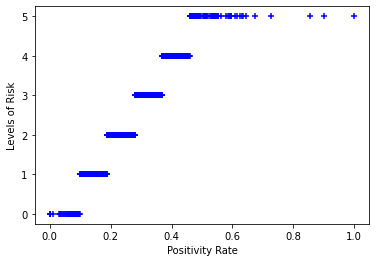

In [40]:
#scatterplot of positivity rate with class
plt.scatter(df['Positivity Rate'], df['risk level positivity'], marker = '+', color = 'blue')
plt.xlabel('Positivity Rate')
plt.ylabel('Levels of Risk')

Text(0, 0.5, 'Levels of Risk')

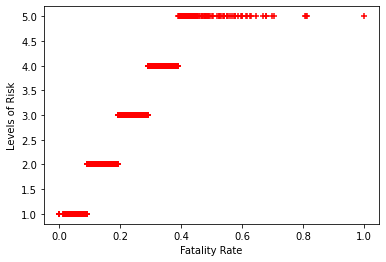

In [41]:
#scatterplot of positivity rate with class
plt.scatter(df['Fatality Rate'], df['risk level fatality'], marker = '+', color = 'red')
plt.xlabel('Fatality Rate')
plt.ylabel('Levels of Risk')